In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = '/content/drive/MyDrive/Colab Notebooks/income.csv'
data = pd.read_csv(df, sep=',')
data

기업규모별(1)  기업규모별(2)                 산업대분류별(1)  2017 2017.1  2018 2018.1  \
0    기업규모별(1)  기업규모별(2)                 산업대분류별(1)  평균소득   중위소득  평균소득   중위소득   
1         총 계        소계                       총 계   287    210   297    220   
2         총 계        소계               농업, 임업 및 어업   203    154   198    163   
3         총 계        소계                        광업   399    351   400    350   
4         총 계        소계                       제조업   366    288   381    300   
..        ...       ...                       ...   ...    ...   ...    ...   
101     비영리기업        소계                   교육 서비스업   388    344   396    350   
102     비영리기업        소계           보건업 및 사회복지 서비스업   204    143   218    160   
103     비영리기업        소계       예술, 스포츠 및 여가관련 서비스업   265    203   254    202   
104     비영리기업        소계  협회 및 단체, 수리 및 기타 개인 서비스업   190    146   202    162   
105     비영리기업        소계                 국제 및 외국기관   392    383   426    408   

     2019 2019.1  2020 2020.1  2021 2021.1  
0    평균소득   중위소득  평균소득   중위소득  평균소득   중위소득  
1     309    234   320    242   333    250  
2     203    179   215    187   217    190  
3     425    366   435    368   461    400  
4     396    315   405    320   427    330  
..    ...    ...   ...    ...   ...    ...  
101   408    360   416    371   414    366  
102   219    175   228    180   231    183  
103   272    222   282    233   293    250  
104   190    152   200    163   204    173  
105   482    421   487    426   525    461  

[106 rows x 13 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   기업규모별(1)   106 non-null    object
 1   기업규모별(2)   106 non-null    object
 2   산업대분류별(1)  106 non-null    object
 3   2017       106 non-null    object
 4   2017.1     106 non-null    object
 5   2018       106 non-null    object
 6   2018.1     106 non-null    object
 7   2019       106 non-null    object
 8   2019.1     106 non-null    object
 9   2020       106 non-null    object
 10  2020.1     106 non-null    object
 11  2021       106 non-null    object
 12  2021.1     106 non-null    object
dtypes: object(13)
memory usage: 10.9+ KB


In [6]:
data.columns

Index(['기업규모별(1)', '기업규모별(2)', '산업대분류별(1)', '2017', '2017.1', '2018', '2018.1',
       '2019', '2019.1', '2020', '2020.1', '2021', '2021.1'],
      dtype='object')

In [7]:
data.rename(columns={'2017':'2017avg'}, inplace=True)

In [8]:
data.columns

Index(['기업규모별(1)', '기업규모별(2)', '산업대분류별(1)', '2017avg', '2017.1', '2018',
       '2018.1', '2019', '2019.1', '2020', '2020.1', '2021', '2021.1'],
      dtype='object')

In [11]:
data.rename(columns={'2017.1':'2017mid'}, inplace=True)
data.rename(columns={'2018':'2018avg'}, inplace=True)
data.rename(columns={'2018.1':'2018mid'}, inplace=True)
data.rename(columns={'2019':'2019avg'}, inplace=True)
data.rename(columns={'2019.1':'2019mid'}, inplace=True)
data.rename(columns={'2020':'2020avg'}, inplace=True)
data.rename(columns={'2020.1':'2020mid'}, inplace=True)
data.rename(columns={'2021':'2021avg'}, inplace=True)
data.rename(columns={'2021.1':'2021mid'}, inplace=True)

In [12]:
data.columns

Index(['기업규모별(1)', '기업규모별(2)', '산업대분류별(1)', '2017avg', '2017mid', '2018avg',
       '2018mid', '2019avg', '2019mid', '2020avg', '2020mid', '2021avg',
       '2021mid'],
      dtype='object')

In [13]:
data.drop([0], axis=0, inplace=True)

In [14]:
data

기업규모별(1) 기업규모별(2)                 산업대분류별(1) 2017avg 2017mid 2018avg  \
1        총 계       소계                       총 계     287     210     297   
2        총 계       소계               농업, 임업 및 어업     203     154     198   
3        총 계       소계                        광업     399     351     400   
4        총 계       소계                       제조업     366     288     381   
5        총 계       소계    전기, 가스, 증기 및 공기 조절 공급업     617     592     619   
..       ...      ...                       ...     ...     ...     ...   
101    비영리기업       소계                   교육 서비스업     388     344     396   
102    비영리기업       소계           보건업 및 사회복지 서비스업     204     143     218   
103    비영리기업       소계       예술, 스포츠 및 여가관련 서비스업     265     203     254   
104    비영리기업       소계  협회 및 단체, 수리 및 기타 개인 서비스업     190     146     202   
105    비영리기업       소계                 국제 및 외국기관     392     383     426   

    2018mid 2019avg 2019mid 2020avg 2020mid 2021avg 2021mid  
1       220     309     234     320     242     333     250  
2       163     203     179     215     187     217     190  
3       350     425     366     435     368     461     400  
4       300     396     315     405     320     427     330  
5       596     635     607     657     620     663     623  
..      ...     ...     ...     ...     ...     ...     ...  
101     350     408     360     416     371     414     366  
102     160     219     175     228     180     231     183  
103     202     272     222     282     233     293     250  
104     162     190     152     200     163     204     173  
105     408     482     421     487     426     525     461  

[105 rows x 13 columns]

In [40]:
data = data[data['2017avg'] != '-']
data = data.astype({'2017avg':'float64'})

data = data[data['2017mid'] != '-']
data = data.astype({'2017mid':'float64'})

data = data[data['2018avg'] != '-']
data = data.astype({'2018avg':'float64'})

data = data[data['2018mid'] != '-']
data = data.astype({'2018mid':'float64'})

data = data[data['2019avg'] != '-']
data = data.astype({'2019avg':'float64'})

data = data[data['2019mid'] != '-']
data = data.astype({'2019mid':'float64'})

data = data[data['2020avg'] != '-']
data = data.astype({'2020avg':'float64'})

data = data[data['2020mid'] != '-']
data = data.astype({'2020mid':'float64'})

data = data[data['2021avg'] != '-']
data = data.astype({'2021avg':'float64'})

data = data[data['2021mid'] != '-']
data = data.astype({'2021mid':'float64'})

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 105
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   기업규모별(1)   100 non-null    object 
 1   기업규모별(2)   100 non-null    object 
 2   산업대분류별(1)  100 non-null    object 
 3   2017avg    100 non-null    float64
 4   2017mid    100 non-null    float64
 5   2018avg    100 non-null    float64
 6   2018mid    100 non-null    float64
 7   2019avg    100 non-null    float64
 8   2019mid    100 non-null    float64
 9   2020avg    100 non-null    float64
 10  2020mid    100 non-null    float64
 11  2021avg    100 non-null    float64
 12  2021mid    100 non-null    float64
dtypes: float64(10), object(3)
memory usage: 10.9+ KB


In [42]:
columns = list(data.columns)

In [43]:
def getCatCol(data):
  cat_columns = []
  for col in data.columns:
    if data[col].dtype == 'object':
      cat_columns.append(col)
  return cat_columns

In [44]:
cat_columns = getCatCol(data)

In [45]:
num_columns = [x for x in columns if x not in cat_columns]

In [46]:
print(columns)
print(cat_columns)
print(num_columns)

['기업규모별(1)', '기업규모별(2)', '산업대분류별(1)', '2017avg', '2017mid', '2018avg', '2018mid', '2019avg', '2019mid', '2020avg', '2020mid', '2021avg', '2021mid']
['기업규모별(1)', '기업규모별(2)', '산업대분류별(1)']
['2017avg', '2017mid', '2018avg', '2018mid', '2019avg', '2019mid', '2020avg', '2020mid', '2021avg', '2021mid']


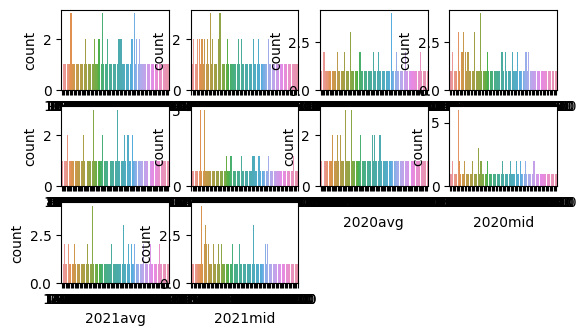

In [47]:
plt.subplot(4, 4, 1)
sns.countplot(data = data, x = "2017avg")

plt.subplot(4, 4, 2)
sns.countplot(data = data, x = "2017mid")

plt.subplot(4, 4, 3)
sns.countplot(data = data, x = "2018avg")

plt.subplot(4, 4, 4)
sns.countplot(data = data, x = "2018mid")

plt.subplot(4, 4, 5)
sns.countplot(data = data, x = "2019avg")

plt.subplot(4, 4, 6)
sns.countplot(data = data, x = "2019mid")

plt.subplot(4, 4, 7)
sns.countplot(data = data, x = "2020avg")

plt.subplot(4, 4, 8)
sns.countplot(data = data, x = "2020mid")

plt.subplot(4, 4, 9)
sns.countplot(data = data, x = "2021avg")

plt.subplot(4, 4, 10)
sns.countplot(data = data, x = "2021mid")

plt.show()

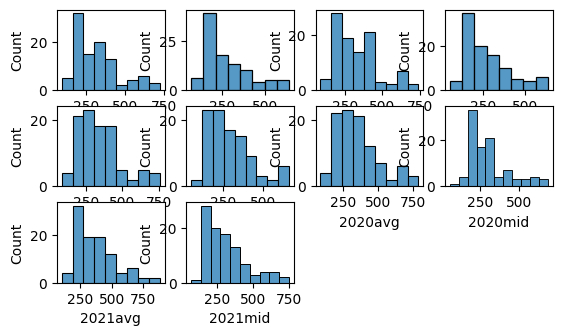

In [49]:
plt.subplot(4, 4, 1)
sns.histplot(data = data, x = "2017avg")

plt.subplot(4, 4, 2)
sns.histplot(data = data, x = "2017mid")

plt.subplot(4, 4, 3)
sns.histplot(data = data, x = "2018avg")

plt.subplot(4, 4, 4)
sns.histplot(data = data, x = "2018mid")

plt.subplot(4, 4, 5)
sns.histplot(data = data, x = "2019avg")

plt.subplot(4, 4, 6)
sns.histplot(data = data, x = "2019mid")

plt.subplot(4, 4, 7)
sns.histplot(data = data, x = "2020avg")

plt.subplot(4, 4, 8)
sns.histplot(data = data, x = "2020mid")

plt.subplot(4, 4, 9)
sns.histplot(data = data, x = "2021avg")

plt.subplot(4, 4, 10)
sns.histplot(data = data, x = "2021mid")

plt.show()

In [53]:
print(data["2017avg"].value_counts())
print(data["2017mid"].value_counts())
print(data["2018avg"].value_counts())
print(data["2018mid"].value_counts())
print(data["2019avg"].value_counts())
print(data["2019mid"].value_counts())
print(data["2020avg"].value_counts())
print(data["2020mid"].value_counts())
print(data["2021avg"].value_counts())
print(data["2021mid"].value_counts())

175.0    3
238.0    3
369.0    3
367.0    2
273.0    2
        ..
666.0    1
203.0    1
419.0    1
345.0    1
190.0    1
Name: 2017avg, Length: 82, dtype: int64
180.0    3
179.0    3
160.0    3
246.0    2
249.0    2
        ..
154.0    1
379.0    1
466.0    1
616.0    1
383.0    1
Name: 2017mid, Length: 80, dtype: int64
381.0    4
231.0    3
298.0    2
132.0    2
174.0    2
        ..
186.0    1
334.0    1
243.0    1
696.0    1
426.0    1
Name: 2018avg, Length: 84, dtype: int64
190.0    4
180.0    3
165.0    3
160.0    3
260.0    2
        ..
275.0    1
391.0    1
481.0    1
636.0    1
408.0    1
Name: 2018mid, Length: 78, dtype: int64
245.0    3
327.0    3
367.0    2
383.0    2
268.0    2
        ..
202.0    1
357.0    1
259.0    1
709.0    1
482.0    1
Name: 2019avg, Length: 89, dtype: int64
179.0    5
175.0    5
222.0    2
355.0    2
327.0    2
        ..
191.0    1
259.0    1
198.0    1
593.0    1
421.0    1
Name: 2019mid, Length: 82, dtype: int64
242.0    3
260.0    3
228.0    2
2

In [54]:
data.describe()

2017avg     2017mid    2018avg     2018mid     2019avg     2019mid  \
count  100.000000  100.000000  100.00000  100.000000  100.000000  100.000000   
mean   321.530000  270.940000  329.68000  279.470000  343.730000  291.950000   
std    140.529479  135.450153  140.67707  134.168705  143.182081  131.009551   
min     96.000000   72.000000   88.00000   54.000000   86.000000   54.000000   
25%    216.500000  165.000000  224.50000  172.500000  236.750000  189.250000   
50%    291.500000  241.500000  298.00000  250.000000  314.000000  262.000000   
75%    388.250000  345.750000  397.75000  342.500000  417.250000  345.250000   
max    720.000000  636.000000  742.00000  637.000000  756.000000  658.000000   

          2020avg     2020mid     2021avg     2021mid  
count  100.000000  100.000000  100.000000  100.000000  
mean   354.800000  301.290000  371.220000  314.360000  
std    146.577935  133.756699  158.408345  141.382247  
min     91.000000   56.000000  104.000000   72.000000  
25%    242.000000  198.500000  250.250000  200.750000  
50%    325.500000  266.000000  338.500000  277.000000  
75%    430.500000  339.250000  452.750000  367.750000  
max    786.000000  682.000000  879.000000  750.000000

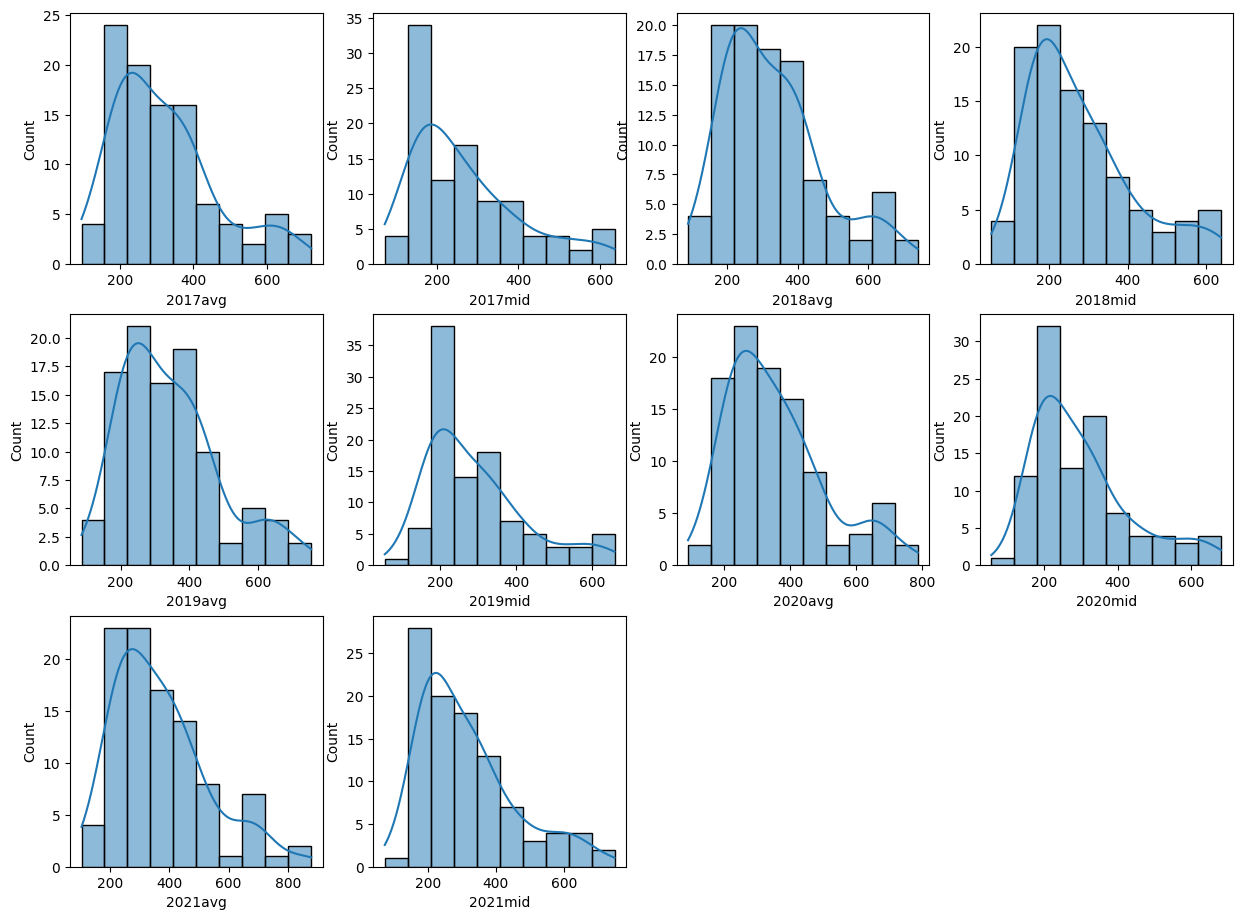

In [68]:
plt.figure(figsize = (15, 15))
for i in range(len(num_columns)):
  plt.subplot(4, 4, i+1)
  sns.histplot(data = data, x = num_columns[i],
      bins = 10,
      kde = True,
      );

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45453 (\N{HANGUL SYLLABLE NONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from current font.
  func(*a

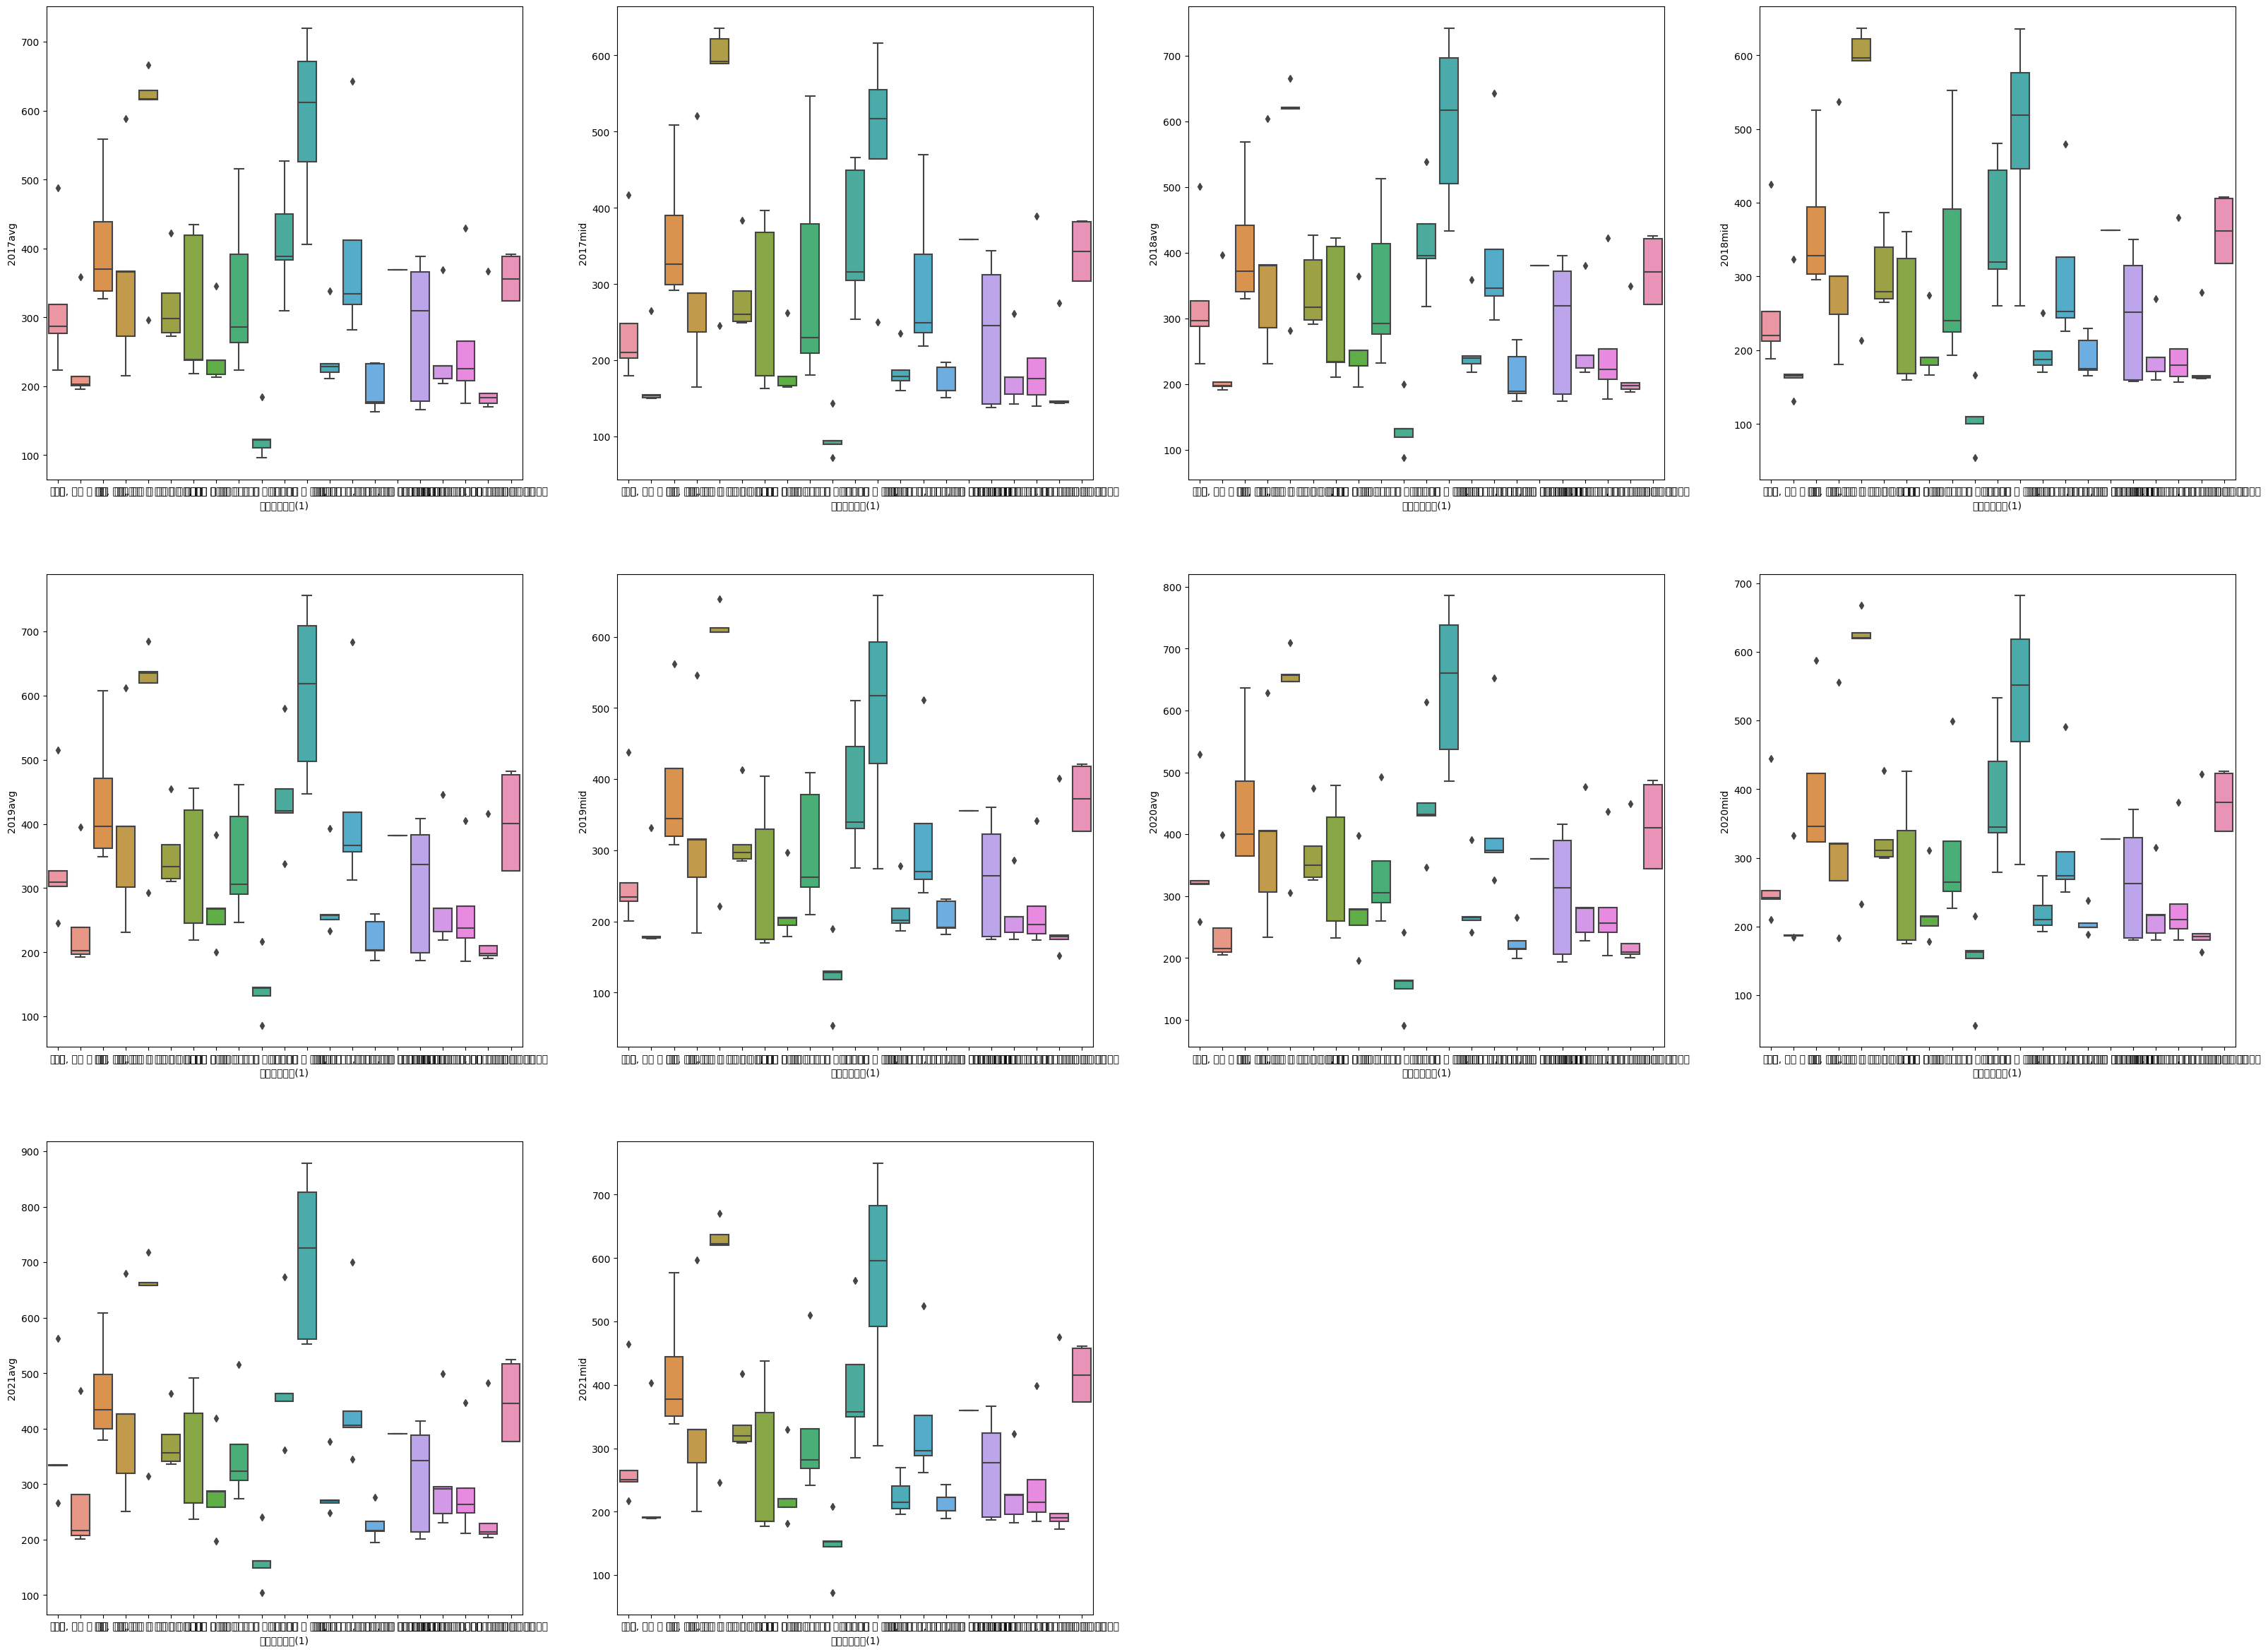

In [57]:
plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.boxplot(data = data, x = "산업대분류별(1)", y = num_columns[i])

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  func(*arg

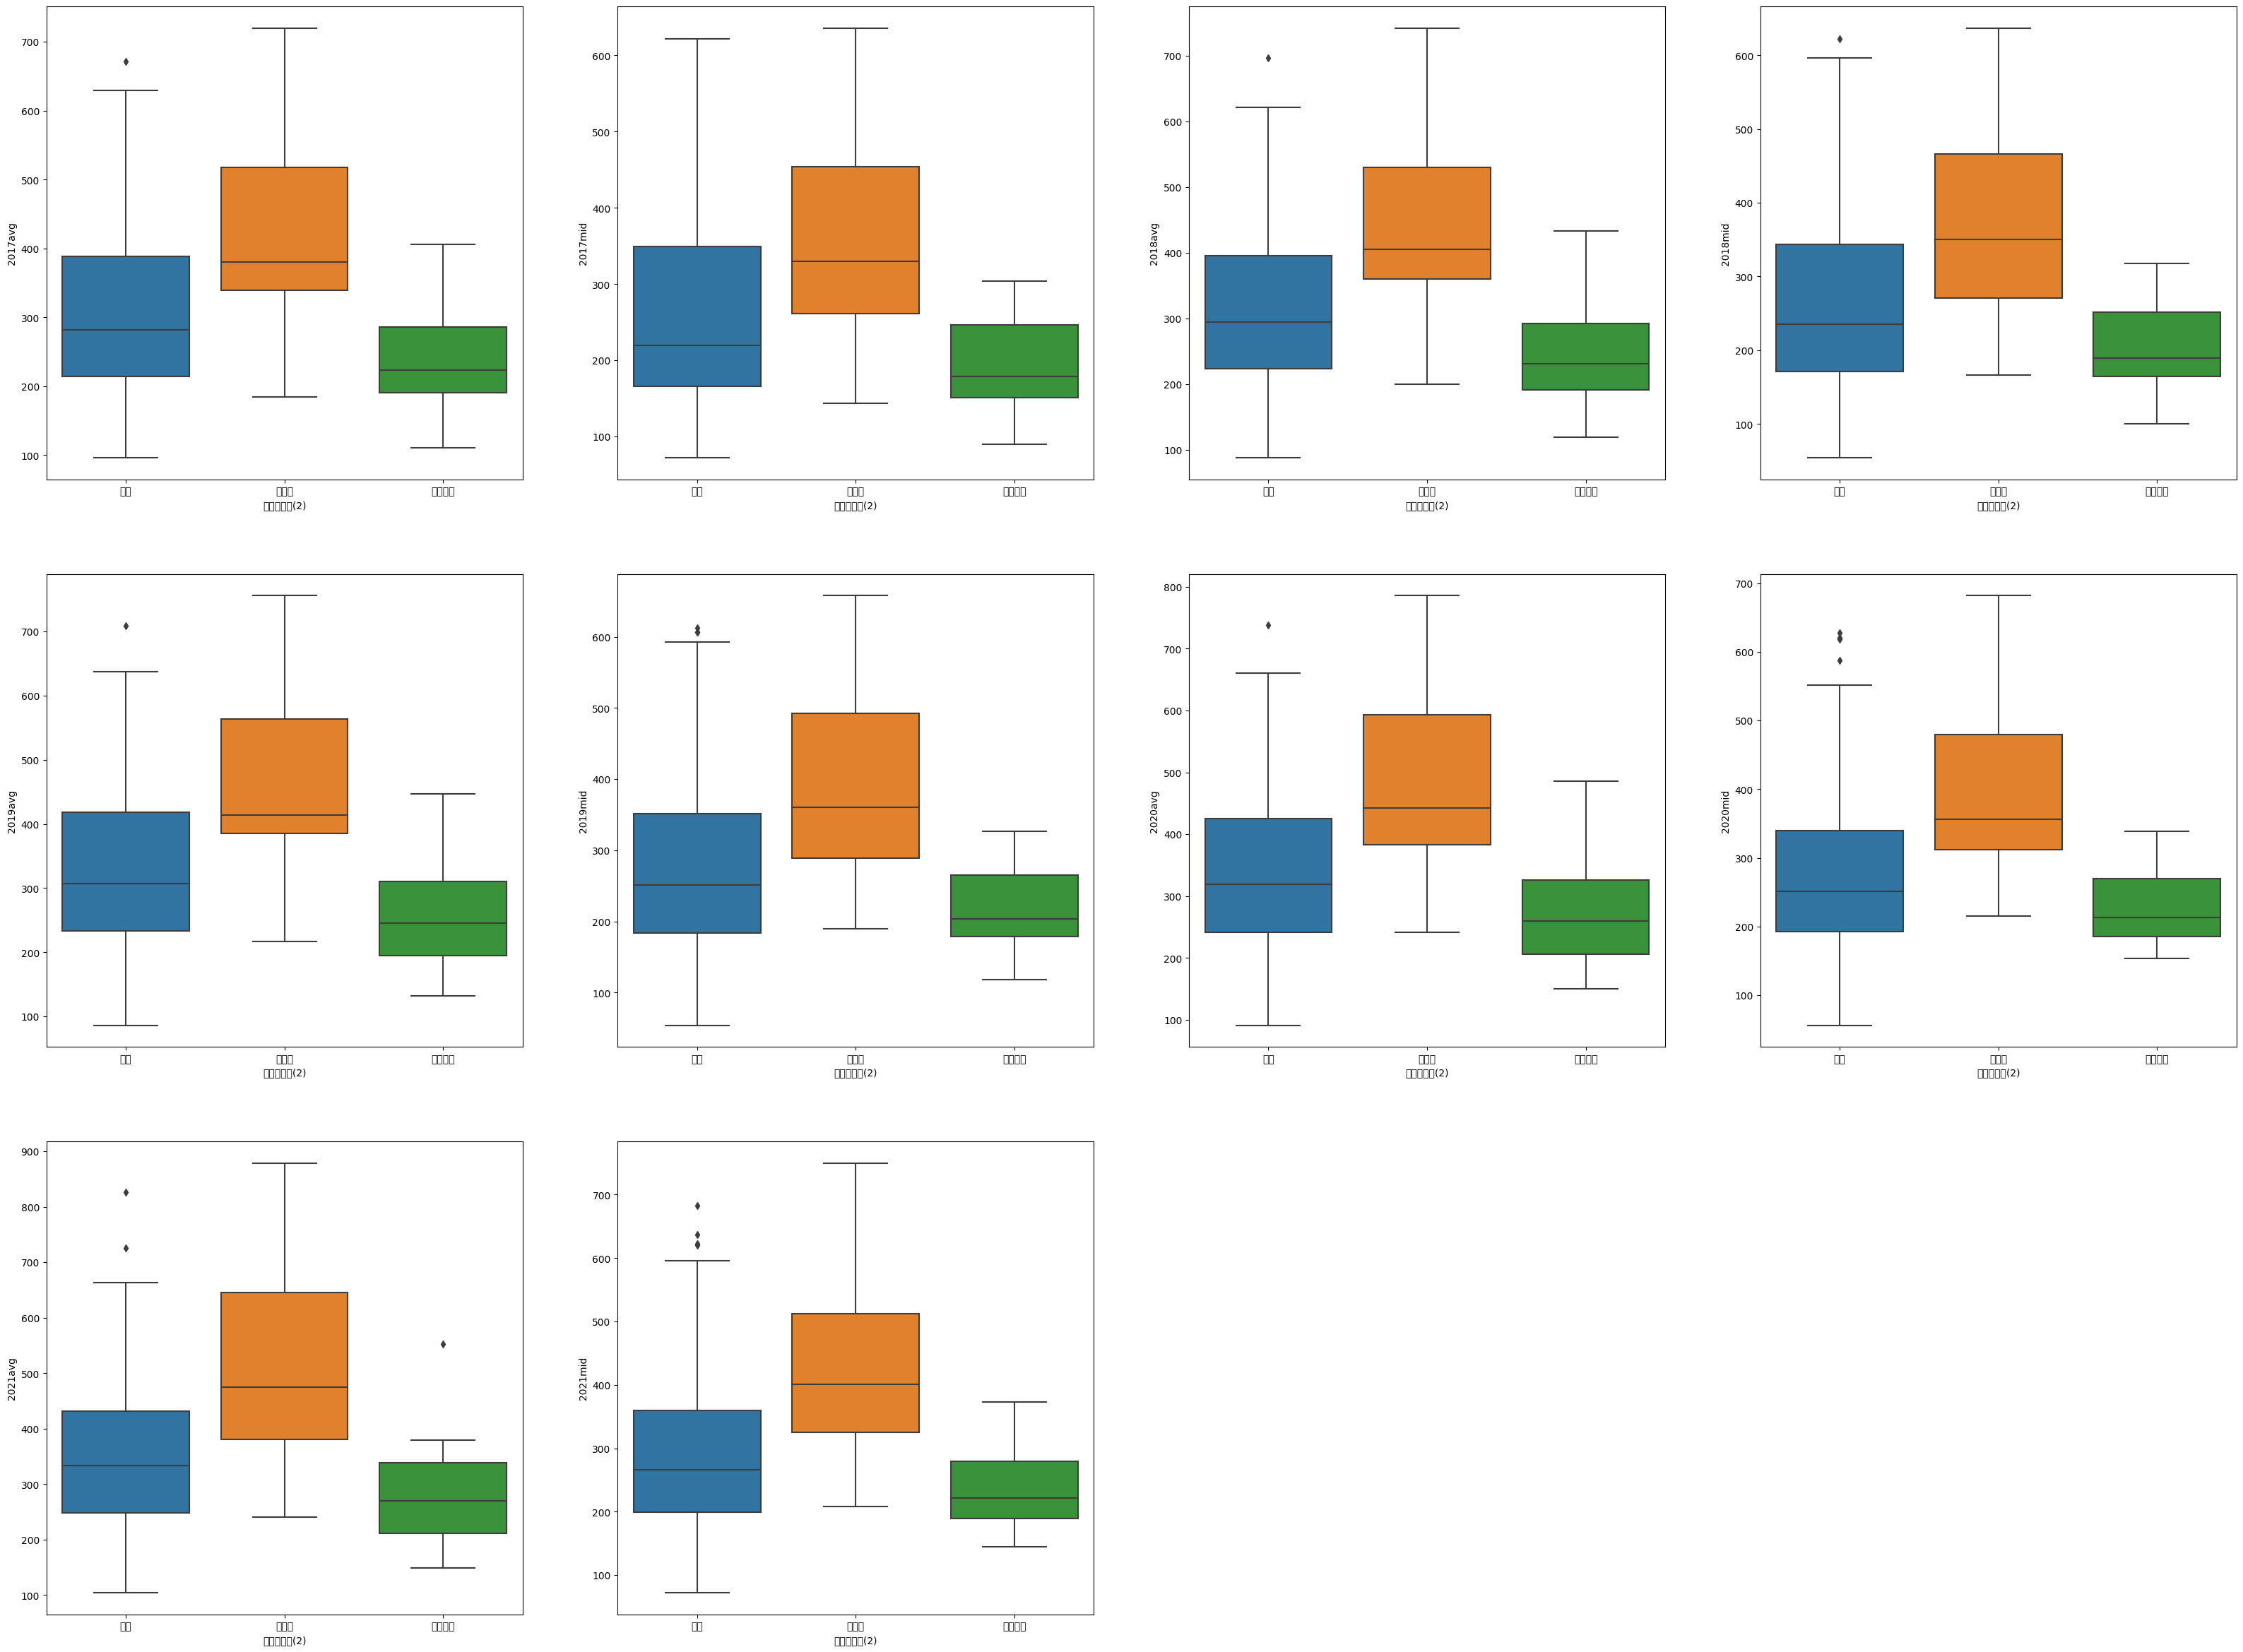

In [58]:
plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.boxplot(data = data, x = "기업규모별(2)", y = num_columns[i])

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  func(*a

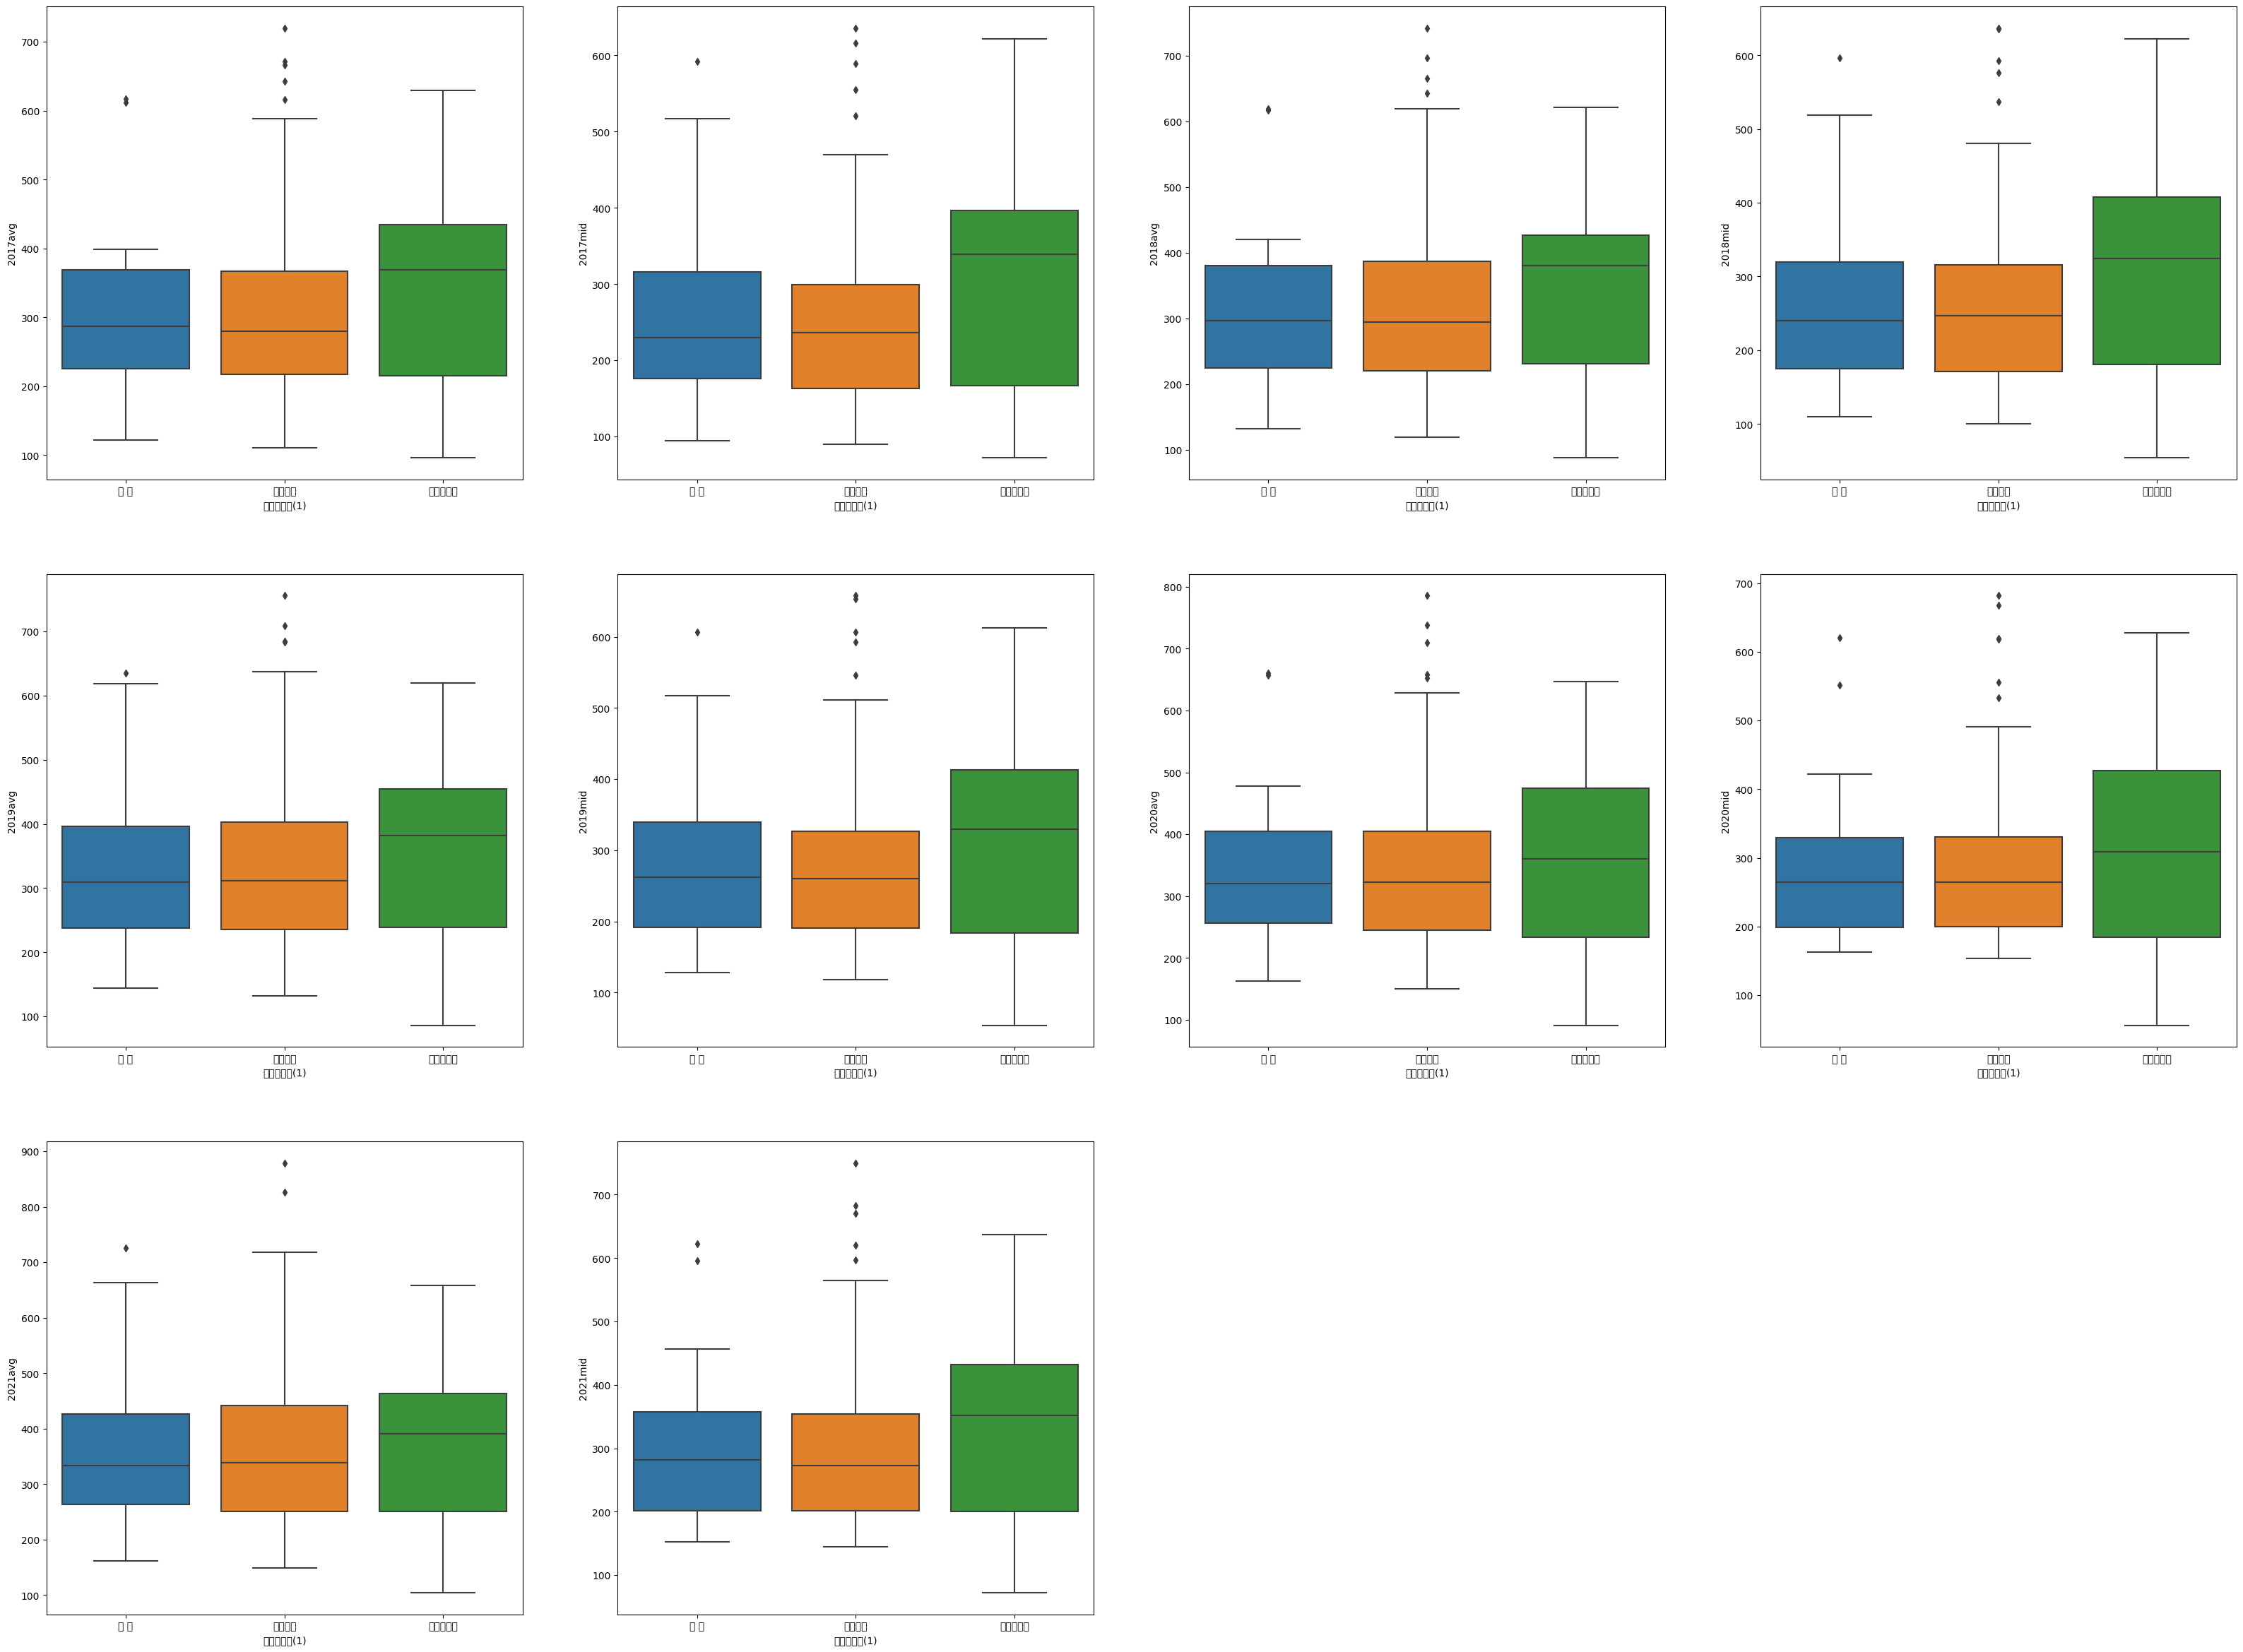

In [59]:
plt.figure(figsize = (40, 40))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.boxplot(data = data, x = "기업규모별(1)", y = num_columns[i])

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45453 (\N{HANGUL SYLLABLE NONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from current font.
  func(*a

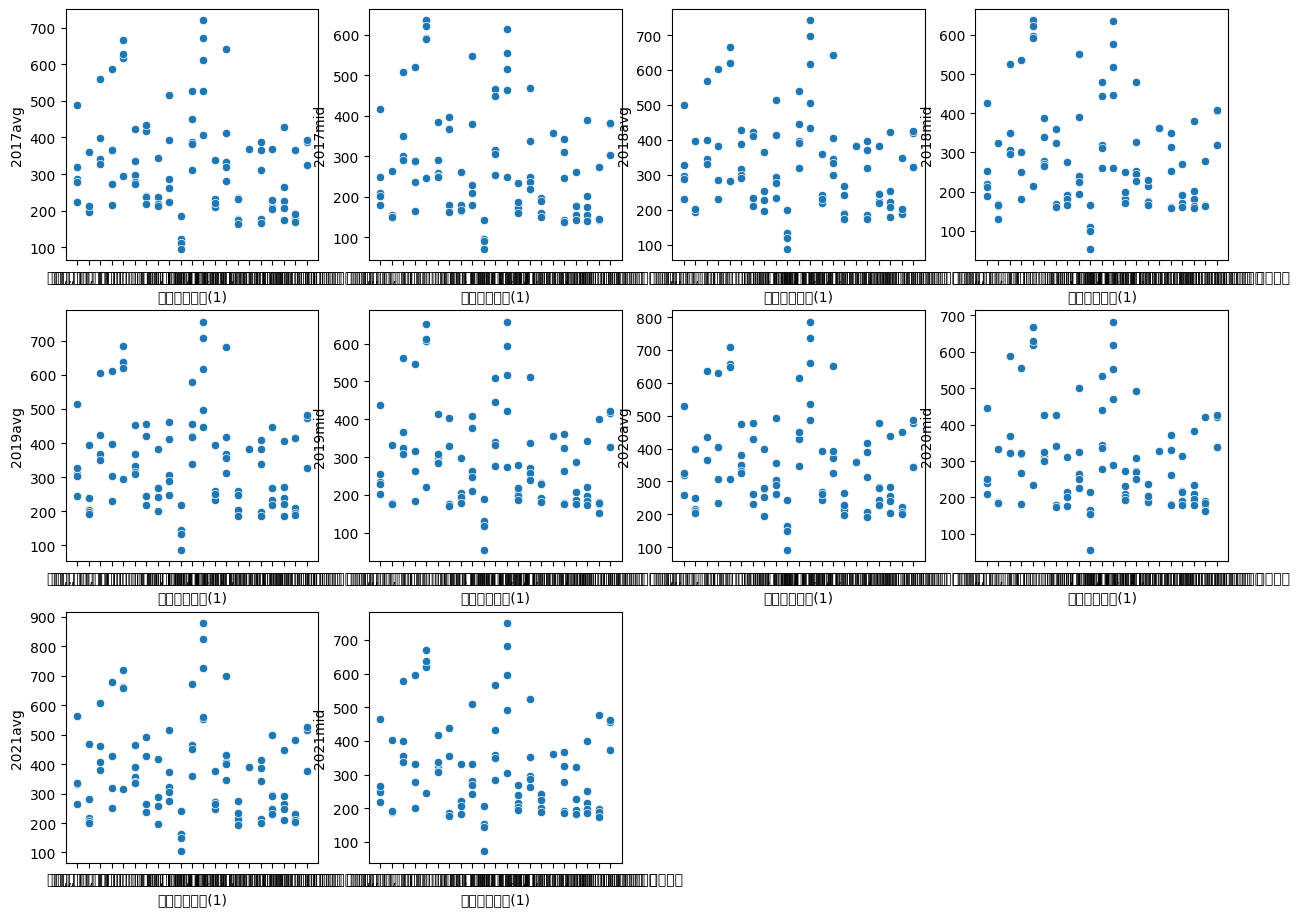

In [60]:
plt.figure(figsize = (15, 15))
for i in range(len(num_columns)):
  ax = plt.subplot(4, 4, i+1)
  ax = sns.scatterplot(data = data, x = "산업대분류별(1)", y = num_columns[i])

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1609: UserWarning: KDE cannot be estimated (0 variance or perfect co

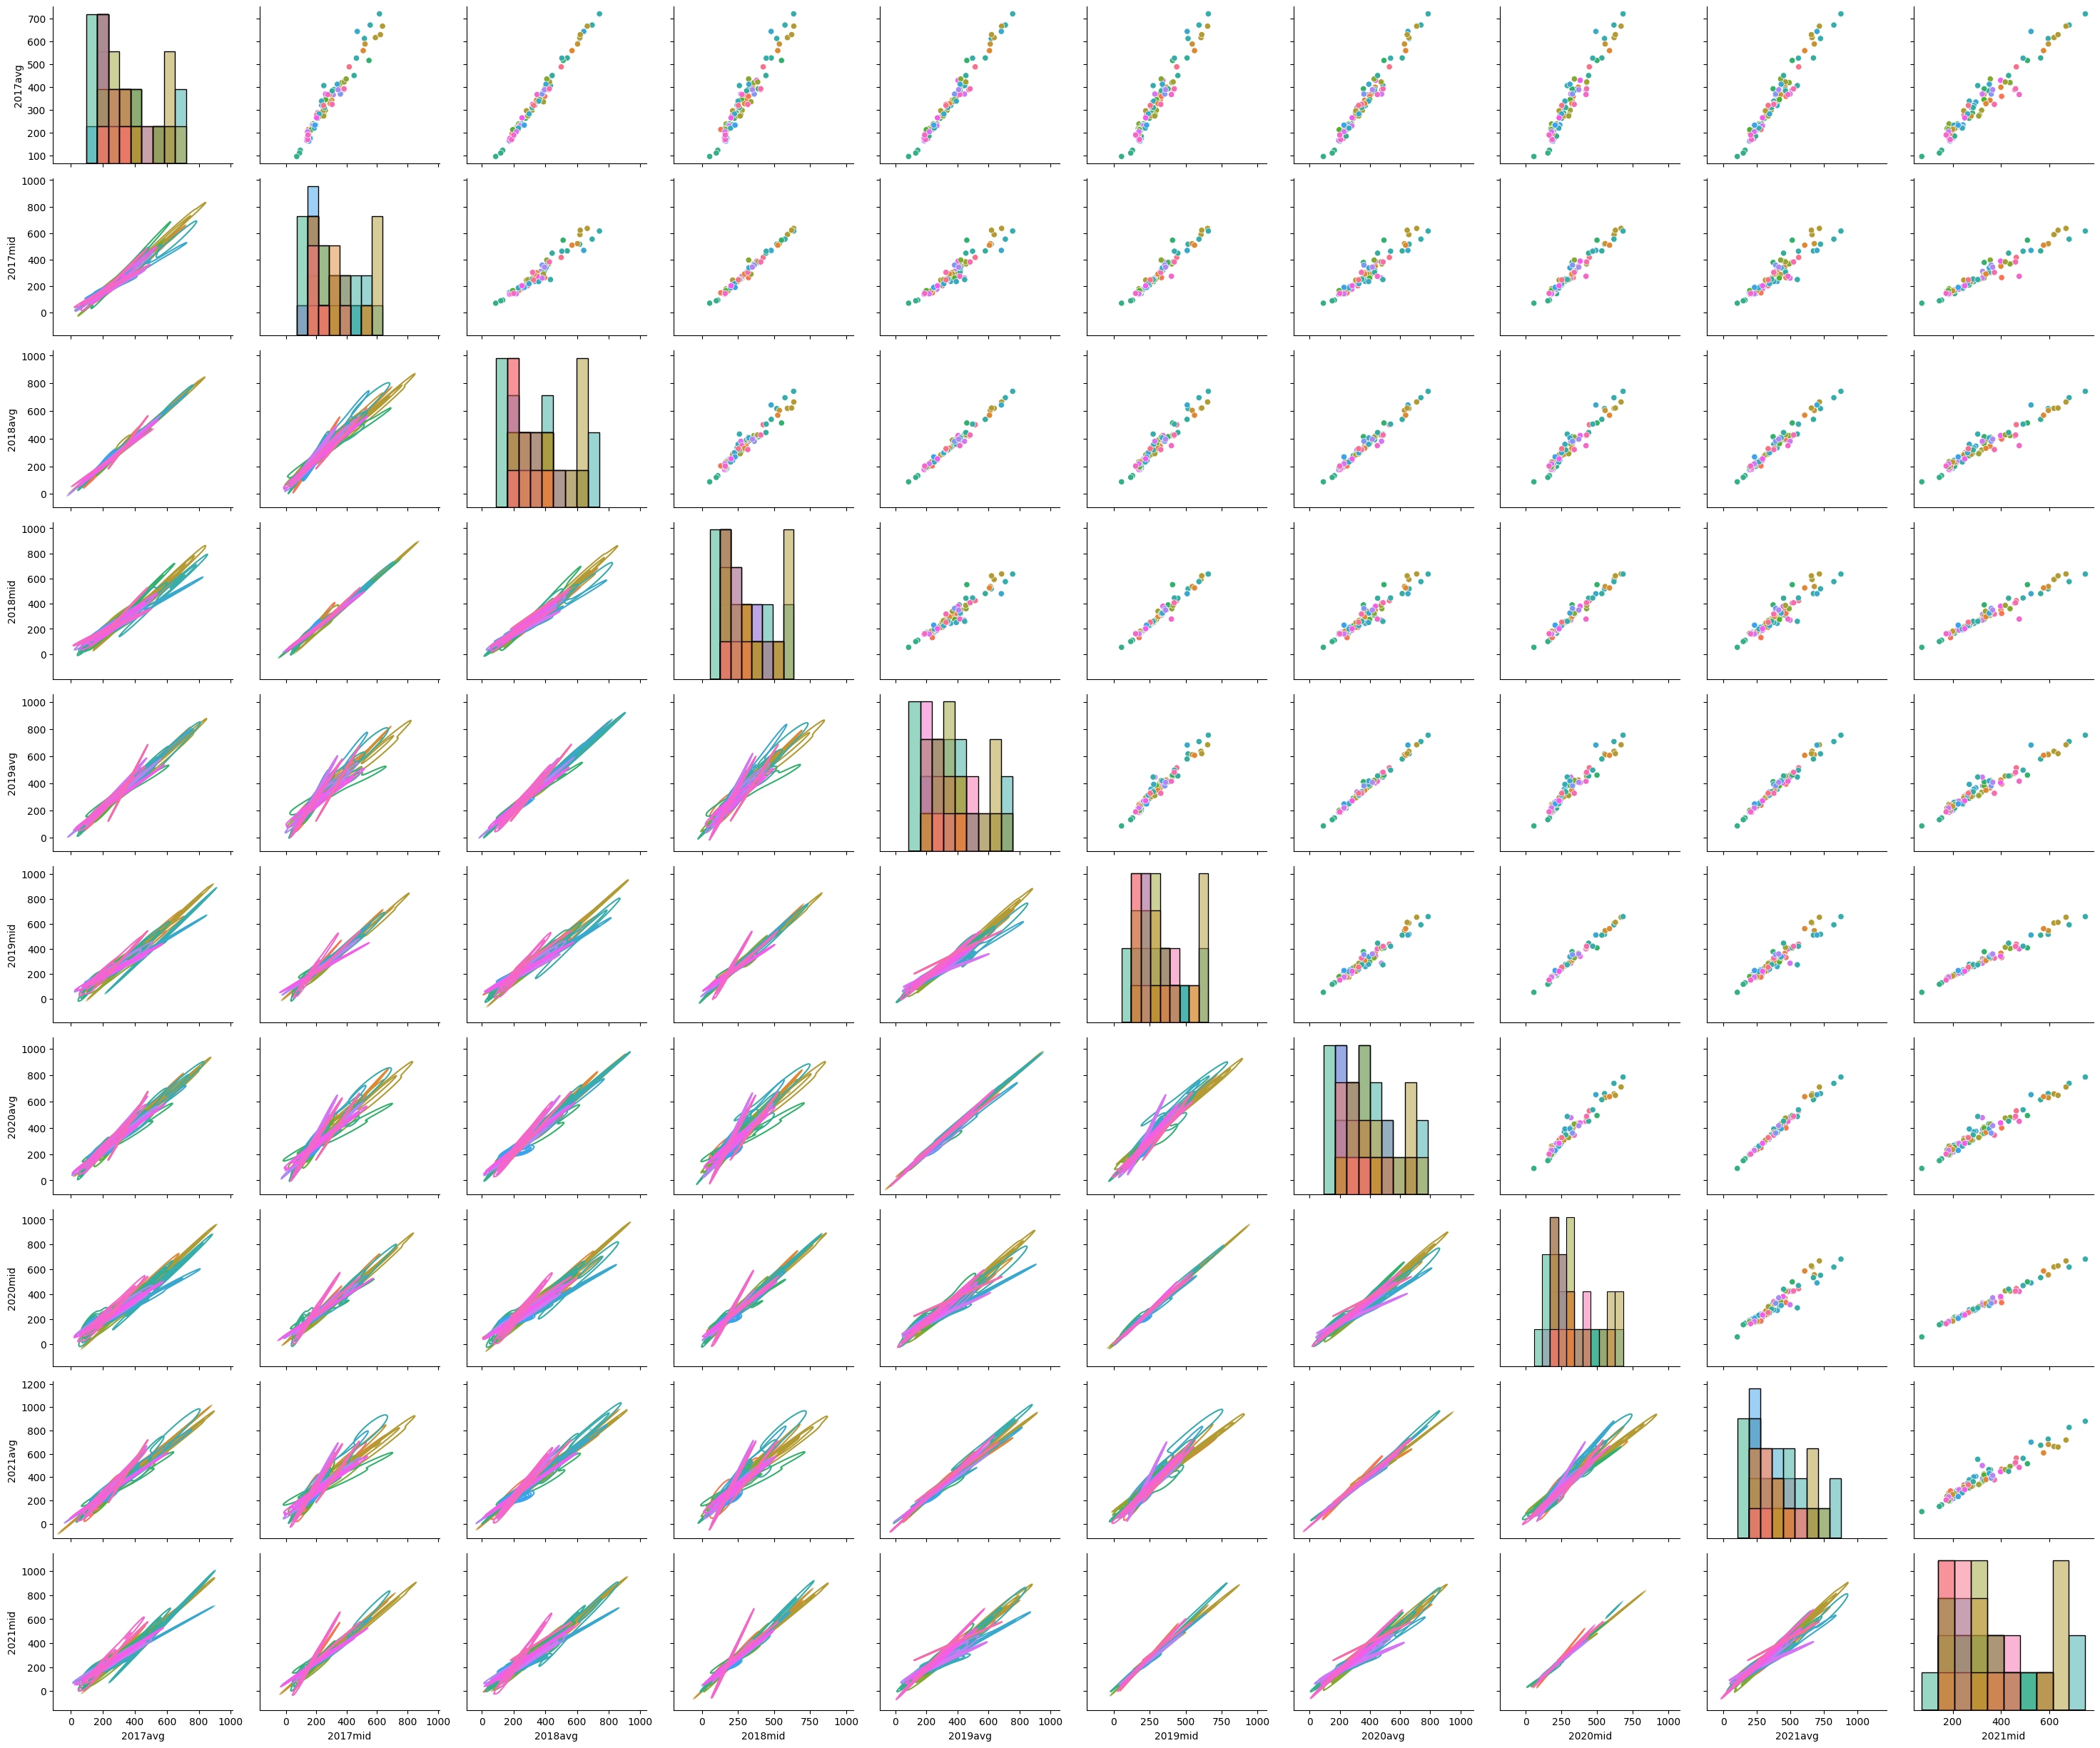

In [69]:
ax = sns.PairGrid(data, diag_sharey=False, aspect=1.2, hue = "산업대분류별(1)")
ax.map_upper(sns.scatterplot)
ax.map_lower(sns.kdeplot)
ax.map_diag(sns.histplot)

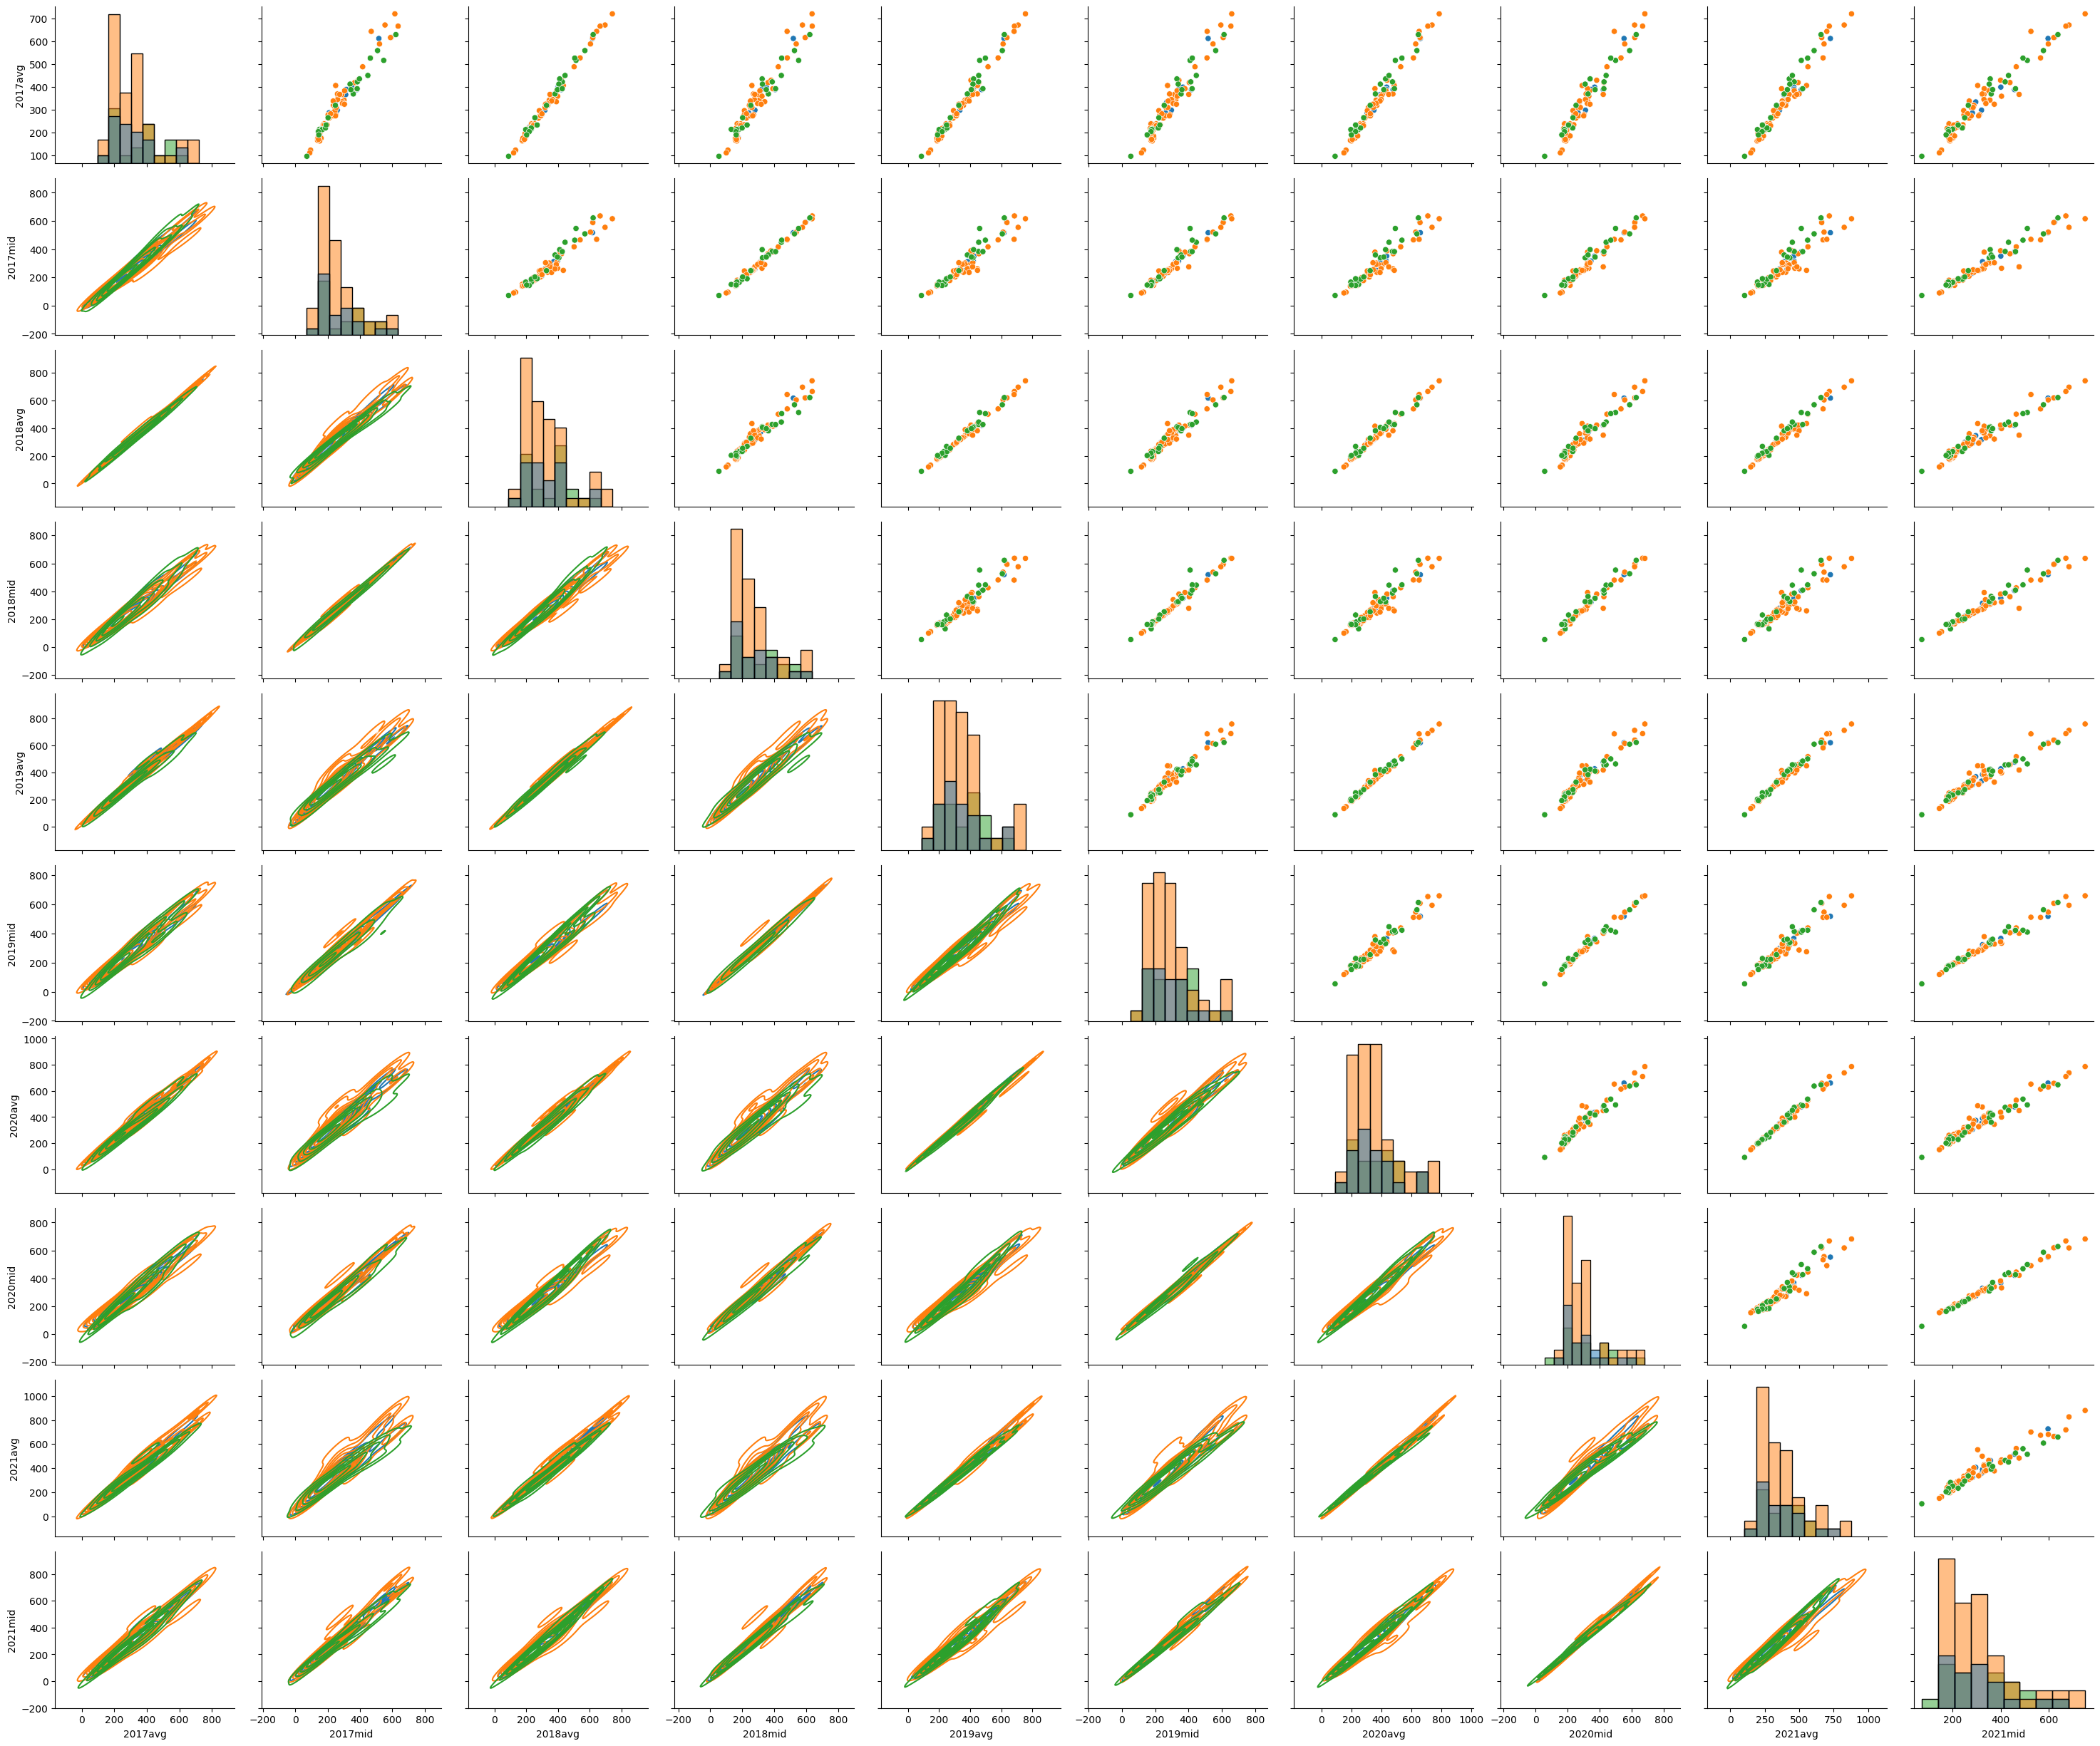

In [70]:
ax = sns.PairGrid(data, diag_sharey=False, aspect=1.2, hue = "기업규모별(1)")
ax.map_upper(sns.scatterplot)
ax.map_lower(sns.kdeplot)
ax.map_diag(sns.histplot)

In [63]:
corr_mat = np.round(data[num_columns].corr(), 4)
corr_mat_long = corr_mat.stack().reset_index(name="correlation")

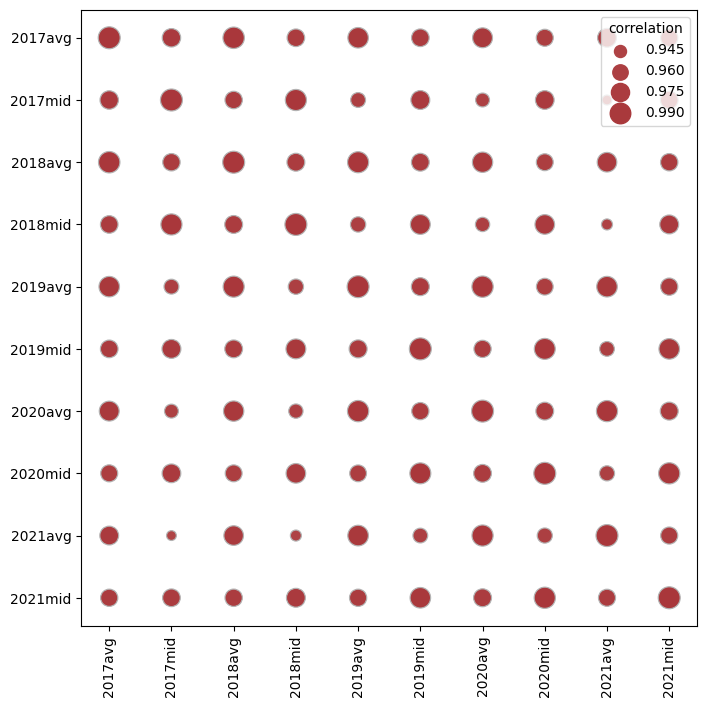

In [64]:
plt.figure(figsize=(8, 8))

ax = sns.scatterplot(data=corr_mat_long, x="level_0", y="level_1", hue="correlation", palette="vlag", hue_norm=(-1, 1), edgecolor=".7", sizes=(50, 250), size="correlation")
ax.set(xlabel="", ylabel="", aspect="equal")
for label in ax.get_xticklabels():
  label.set_rotation(90)

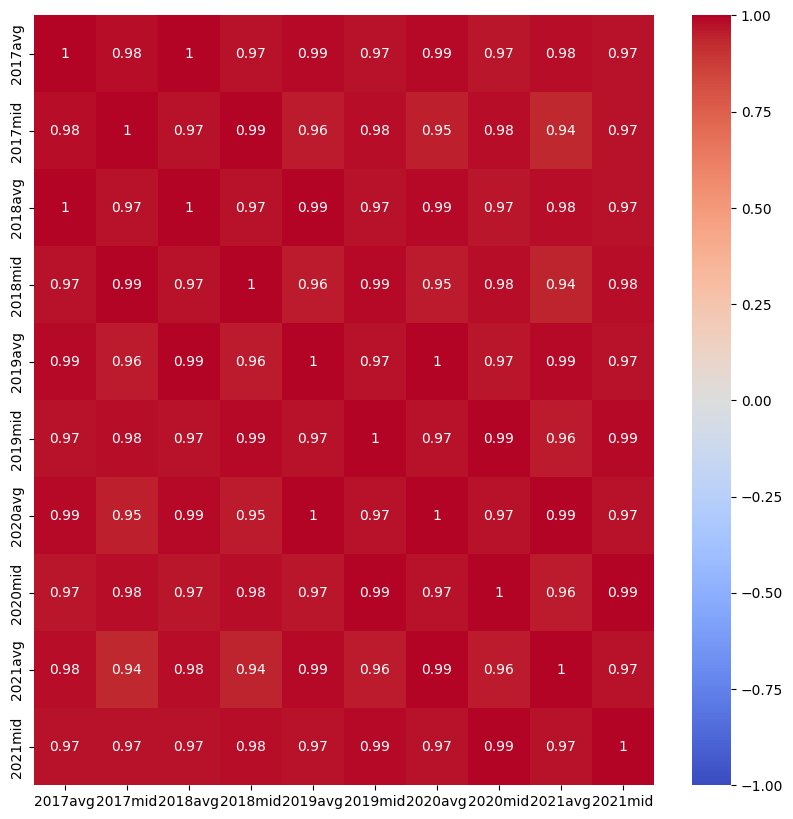

In [65]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr_mat, vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")
plt.show()

<Figure size 1000x1000 with 0 Axes>

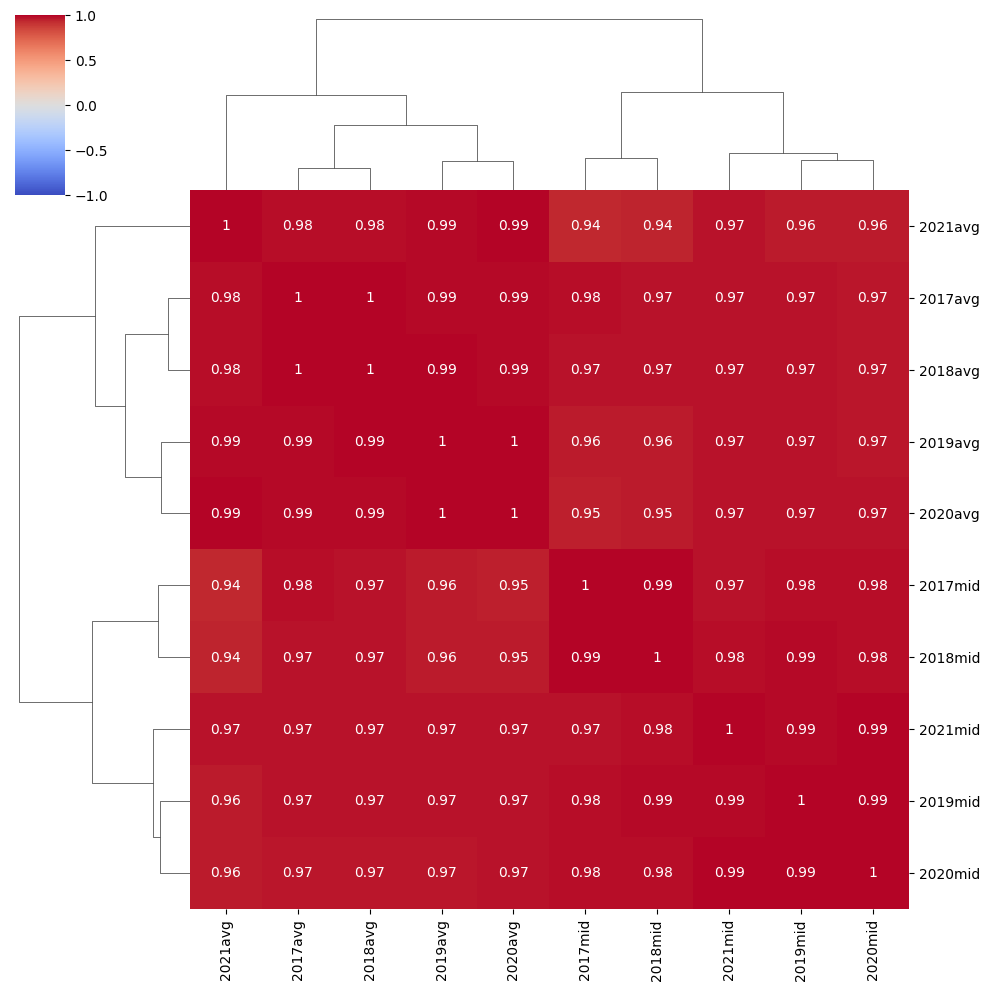

In [66]:
plt.figure(figsize=(10, 10))
ax = sns.clustermap(corr_mat, vmin = -1, vmax = 1, annot = True, cmap = "coolwarm")